In [63]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf

# Iris 

In [64]:
# Cargar el dataset de Iris
iris = datasets.load_iris()
binary_target = np.array([1.0 if x == 0 else 0.0 for x in iris.target])
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

batch_size = 20

In [65]:
#Divide en training y test

#saca los id del conjunto de training y de test
train_idx = np.random.choice(len(iris_2d), size=round(len(iris_2d)*0.8),replace=False)
test_idx = np.array(list(set(range(len(iris_2d)))-set(train_idx)))

x_vals_train = iris_2d[train_idx]
x_vals_test = iris_2d[test_idx]
y_vals_train = binary_target[train_idx]
y_vals_test = binary_target[test_idx]

In [66]:
# Definir variables y modelo
class LogisticModel(tf.Module):
    def __init__(self):
        self.A = tf.Variable(tf.random.normal(shape=[1, 1], dtype=tf.float32), name='A')
        self.b = tf.Variable(tf.random.normal(shape=[1, 1], dtype=tf.float32), name='b')
    
    def __call__(self, x2_data):
        return tf.add(tf.matmul(x2_data, self.A), self.b)

model = LogisticModel()


In [67]:
# Definir la pérdida y el optimizador
def loss_fn(model, x1_data, x2_data, y_target):
    my_prediction = tf.subtract(x1_data, model(x2_data))
    xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_prediction, labels=y_target)
    return tf.reduce_mean(xentropy)

optimizer = tf.optimizers.SGD(learning_rate=0.1)

In [68]:
def train_step(model, x1_data, x2_data, y_target):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, x1_data, x2_data, y_target)
    gradients = tape.gradient(loss, [model.A, model.b])
    optimizer.apply_gradients(zip(gradients, [model.A, model.b]))

for i in range(5000):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_idx]
    rand_x1 = np.array([[x[0]] for x in rand_x], dtype=np.float32)
    rand_x2 = np.array([[x[1]] for x in rand_x], dtype=np.float32)
    rand_y = np.array([[y] for y in y_vals_train[rand_idx]], dtype=np.float32)
    train_step(model, rand_x1, rand_x2, rand_y)
    if (i + 1) % 500 == 0:
        print('Paso #' + str(i + 1) + ", A=" + str(model.A.numpy()) + ", b=" + str(model.b.numpy()))


Paso #500, A=[[6.1000886]], b=[[-1.3715048]]
Paso #1000, A=[[7.354166]], b=[[-2.3397014]]
Paso #1500, A=[[8.14906]], b=[[-2.9602356]]
Paso #2000, A=[[8.783617]], b=[[-3.380299]]
Paso #2500, A=[[9.266928]], b=[[-3.7383907]]
Paso #3000, A=[[9.642986]], b=[[-4.0835094]]
Paso #3500, A=[[10.007466]], b=[[-4.3288383]]
Paso #4000, A=[[10.320749]], b=[[-4.5693707]]
Paso #4500, A=[[10.59466]], b=[[-4.75955]]
Paso #5000, A=[[10.837945]], b=[[-4.9542794]]


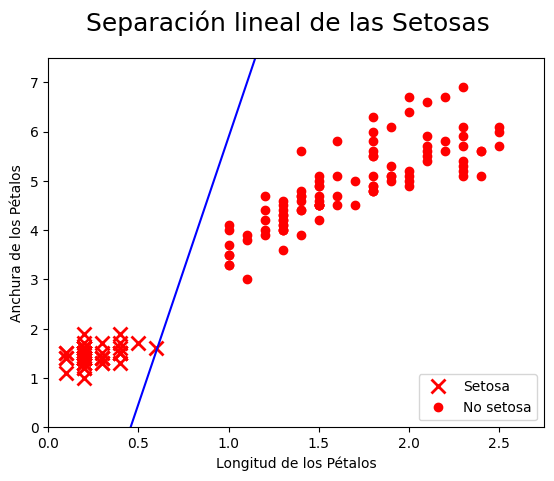

In [69]:
# Obtener la línea de separación
slope = model.A.numpy()[0][0]
intercept = model.b.numpy()[0][0]

x = np.linspace(0, 3, num=100)
abline_values = slope * x + intercept

setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i] == 1]
setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i] == 1]

no_setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i] == 0]
no_setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i] == 0]

plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='Setosa')
plt.plot(no_setosa_x, no_setosa_y, 'ro', label="No setosa")
plt.plot(x, abline_values, 'b-')
plt.suptitle('Separación lineal de las Setosas', fontsize=18)
plt.xlabel("Longitud de los Pétalos")
plt.ylabel("Anchura de los Pétalos")
plt.legend(loc="lower right")
plt.xlim([0, 2.75])
plt.ylim([0, 7.5])
plt.show()
